In [1]:
import torch
from numpy import dtype
from sympy.codegen.ast import float32
from tensorboard.summary.v1 import image
from torchvision.transforms.v2 import ToTensor

x = torch.rand(3)
print(x)

torch.cuda.is_available()

x = torch.empty(3)
print(x)

tensor([0.1361, 0.9594, 0.1303])


True

In [ ]:
x = torch.empty(2, 3)
print(x)

In [ ]:
x = torch.empty(2, 3, 2)
print(x)

In [ ]:
x = torch.empty(2, 3, 2, 2)
print(x)

In [ ]:
x = torch.rand(2,2)
print(x)

In [ ]:
x = torch.zeros(2,2)
print(x)

In [ ]:
x = torch.ones(2,2)
print(x)

In [ ]:
x = torch.ones(2,2)
print(x.dtype)

In [ ]:
x = torch.ones(2,2, dtype=torch.int) #torch.double, torch.float16, torch.float64
print(x.dtype) #prints the dtype of the current tensor

In [ ]:
x = torch.ones(2,2, dtype=torch.float16)
print(x.size()) # prints the size of the current tensor

In [ ]:
x = torch.tensor([2.5, 0.1])
print(x)

BASIC OPERATIONS

In [ ]:
x = torch.rand(2,2)
y = torch.rand(2,2)
print(x)
print(y)
z = x + y
z = torch.add(x,y)
print(z) # it does element wise addition


In [ ]:
y.add_(x) # inplace operation. Add all of the x's to the y. It modifies the variable in which it is applied to
print(y)

In [ ]:
z = x - y
z = torch.sub(x,y)
print(z)

In [ ]:
z = x * y
z = torch.mul(x,y)
print(z)
y.mul_(x) #inplace operation

In [ ]:
z = x / y
z = torch.div(x,y)

In [ ]:
#slciing operations
x = torch.rand(5,3)
print(x[:,0]) #slicing for all rows but only the first column of each row
print(x[1, :]) #slicing for only the first row but all of the columns from said row
#you can also get the value of a tensor, if and only if is a single element tensor
print(x[1, 1].item())


In [ ]:
# reshaping a tensor
x = torch.rand(4,4)
print(x)
y = x.view(16) #resizes the 16 values in a 4x4 tensor and a single 1x16. NOTE: the number of elements must match
print(y)

y = x.view(-1, 8) #if we don't want to resize to a single dimension tensor, then we can put a -1 on the first position and pytorch will correctly assume the dimension for the number of rows. i.e. 2x8
print(y.size)

In [2]:
#converting from numpy to tensor and viceversa
import numpy as np
# convert from a tensor into a np array
a = torch.ones(5)
print(a)
b = a.numpy()
print(type(b))  #i.e. numpy ndarray

#if the tensor is in the cpu, then both objects(tensor and nparray) will share the same memory location, so any change to either will reflect on the other
a.add_(1)
print(a)
print(b)

tensor([1., 1., 1., 1., 1.])
<class 'numpy.ndarray'>
tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


In [4]:
#convert from a numpy array to a tensor
a = np.ones(5)
print(a)
b = torch.from_numpy(a) #be careful changing the dtype, both must match. Otherwise you get an error
print(b)

a += 1
print(a)
print(b)


[1. 1. 1. 1. 1.]
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)
[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


In [6]:
#gpu operations
if torch.cuda.is_available():
    device = torch.device('cuda')
    x = torch.ones(5, device=device) #creates a tensor in the GPU 
    y = torch.ones(5) 
    y = y.to(device) # this moves the tensor to the GPU
    z = x + y # this will be computed in the GPU
    # you can't convert a GPU tensor into a numpy ndarray, so you must first move it into the cpu(numpy can only handle cpu tensors)
    z = z.to("cpu")
    print(z)

tensor([2., 2., 2., 2., 2.])


In [ ]:

x = torch.ones(5, requires_grad=True) #the requires_grad flag is FALSE by default. It tells pytorch that it will need to calculate the gradients for this tensor later in the optimization steps. 
print(x) # this will also print the requires_grad flag as well

Gradient Calculations with autograd

In [7]:
#gradients are essential for optimization
import torch 

x = torch.rand(3, requires_grad=True) # must specify the requires_grad to calculate the gradients
print(x)
y = x + 2 # pytorch creates a computational graph
# pytorch will compute the forward pass, and create a grad_fn function and calculate the gradients during the backpropagation step(dy/dx)
print(y) #has a grad_fn for AddBackward
z = y*y*2
print(z) #has a grad_fn for MulBackward
z = z.mean()
print(z) # has a grad_fn for MeanBackward

# now when we calculate the gradients for z 
z.backward() #backward gradient calculation  dz/dx. The backward function will only work with scalar values(single value), if called without an argument
print(x.grad) # the gradients are stored in x.grad
#NOTE if we don't specify the requires_grad, then we won't have a .backward() grad_fn, giving us an error
 



tensor([0.5928, 0.9772, 0.1487], requires_grad=True)
tensor([2.5928, 2.9772, 2.1487], grad_fn=<AddBackward0>)


The gradient calculation calculates a Jacobian product to get the gradients. We multiply the jacobian matrix containing the partial derivatives with a gradient vector(of the same size )

In [ ]:
v = torch.tensor([0.1, 1.0, 0.001], dtype=torch.float32)
z.backward(v) #dz/dx
print(x.grad)

In [8]:
# sometimes during our training, when we want update the weight, we don't want pytorch to calculate the gradients
# we have 3 options for this

# x.requires_grad_(False)
# x.detach()
# with torch.no_grad()

x.requires_grad_(False) # the underscore means that pytorch will modify the variable in place
print(x)

y = x.detach() # creates a new tensor with the same values but it doesn't requrie the gradients (so requires_grad = False)
print(y)

with torch.no_grad():
    z = x + 2
    print(z)

tensor([0.5928, 0.9772, 0.1487])
tensor([0.5928, 0.9772, 0.1487])
tensor([2.5928, 2.9772, 2.1487])


In [11]:
# VERY IMPORTANT: Whenever we call the backward function, then the gradient for the tensor will be accumulated into the .grad attribute, so the values will be summed up
weights = torch.ones(4, requires_grad=True)
for epoch in range(3):
    model_output = (weights*3).sum()
    
    model_output.backward()
    
    print(weights.grad) #gradients get aggregated [[3...],[6....],[9.....]]
    weights.grad.zero_() #you must empty the gradients after each iteration to get the correct gradients [3....]
    
# same thing but with an optimizer
optimizer = torch.optim.SGD(weights, lr=0.01)
optimizer.step() # next iteration
optimizer.zero_grad() # empty the gradients 

tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


BACKPROPAGATION - THEORY WITH EXAMPLES

In [12]:
import torch

x = torch.tensor(1.0)
y = torch.tensor(2.0)

w = torch.tensor(1.0, requires_grad=True)

#forward pass and compute the loss
y_hat = w * x
loss = (y_hat - y)**2
print(loss)

#backward pass
loss.backward() #calculates the gradients during the backward pass and stores them in the tensors that have requires_grad 
print(w.grad) #prints the stored gradients for w

##update weights
## next forward and backward pass

tensor(1., grad_fn=<PowBackward0>)
tensor(-2.)


GRADIENT DESCENT WITH AUTOGRAD AND BACKPROPAGATION

In [14]:
import numpy as np

# f = w * x
# f = 2 * x
x = np.array([1, 2, 3, 4], dtype=np.float32)
y = np.array([2, 4, 6, 8], dtype=np.float32)

w = 0.0

# calculate the model prediction
def forward(x):
    return w * x
# calculate the loss = MSE
def loss(y, y_predicted):
    return ((y_predicted - y) ** 2).mean()
# calculate the gradient
# MSE = 1/N * (w*x - y)**2
# dJ/dw = 1/N 2x (w*x - y)
def gradient(x,y,y_predicted):
    return np.dot(2*x, y_predicted-y).mean()

print(f'Prediction before training: f(5) = {forward(5):.3f}')

# Training
learning_rate = 0.01
n_iters = 20

for epoch in range(n_iters):
    # prediction = forward pass
    y_pred = forward(x)
    # loss
    l = loss(y, y_pred)
    # gradient
    dw = gradient(x,y,y_pred)
    # update the weights
    w -= learning_rate*dw
    if epoch % 2 == 0:
        print(f'epoch {epoch + 1}: w = {w:.3f}, loss = {l:.8f}')

print(f'Prediction after training: f(5) = {forward(5):.3f}')

Prediction before training: f(5) = 0.000
epoch 1: w = 1.200, loss = 30.00000000
epoch 3: w = 1.872, loss = 0.76800019
epoch 5: w = 1.980, loss = 0.01966083
epoch 7: w = 1.997, loss = 0.00050332
epoch 9: w = 1.999, loss = 0.00001288
epoch 11: w = 2.000, loss = 0.00000033
epoch 13: w = 2.000, loss = 0.00000001
epoch 15: w = 2.000, loss = 0.00000000
epoch 17: w = 2.000, loss = 0.00000000
epoch 19: w = 2.000, loss = 0.00000000
Prediction after training: f(5) = 10.000


In [17]:
#gradient calculation with torch
import torch

# f = w * x
# f = 2 * x
x = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# calculate the model prediction
def forward(x):
    return w * x
# calculate the loss = MSE
def loss(y, y_predicted):
    return ((y_predicted - y) ** 2).mean()
# calculate the gradient
# MSE = 1/N * (w*x - y)**2
# dJ/dw = 1/N 2x (w*x - y)
def gradient(x,y,y_predicted):
    return np.dot(2*x, y_predicted-y).mean()

print(f'Prediction before training: f(5) = {forward(5):.3f}')

# Training
learning_rate = 0.01
n_iters = 100

for epoch in range(n_iters):
    # prediction = forward pass
    y_pred = forward(x)
    # loss
    l = loss(y, y_pred)
    # gradient = backward pass
    l.backward() #dl/dw
    # update the weights
    with torch.no_grad():
        w -= learning_rate*w.grad
    
    # zero gradients
    w.grad.zero_()
    
    if epoch % 2 == 0:
        print(f'epoch {epoch + 1}: w = {w:.3f}, loss = {l:.8f}')

print(f'Prediction after training: f(5) = {forward(5):.3f}')

Prediction before training: f(5) = 0.000
epoch 1: w = 0.300, loss = 30.00000000
epoch 3: w = 0.772, loss = 15.66018772
epoch 5: w = 1.113, loss = 8.17471695
epoch 7: w = 1.359, loss = 4.26725292
epoch 9: w = 1.537, loss = 2.22753215
epoch 11: w = 1.665, loss = 1.16278565
epoch 13: w = 1.758, loss = 0.60698116
epoch 15: w = 1.825, loss = 0.31684780
epoch 17: w = 1.874, loss = 0.16539653
epoch 19: w = 1.909, loss = 0.08633806
epoch 21: w = 1.934, loss = 0.04506890
epoch 23: w = 1.952, loss = 0.02352631
epoch 25: w = 1.966, loss = 0.01228084
epoch 27: w = 1.975, loss = 0.00641066
epoch 29: w = 1.982, loss = 0.00334642
epoch 31: w = 1.987, loss = 0.00174685
epoch 33: w = 1.991, loss = 0.00091188
epoch 35: w = 1.993, loss = 0.00047601
epoch 37: w = 1.995, loss = 0.00024848
epoch 39: w = 1.996, loss = 0.00012971
epoch 41: w = 1.997, loss = 0.00006770
epoch 43: w = 1.998, loss = 0.00003534
epoch 45: w = 1.999, loss = 0.00001845
epoch 47: w = 1.999, loss = 0.00000963
epoch 49: w = 1.999, loss 

In [18]:
# 1) Design model (input, output size, forward pass)
# 2) Construct the loss and optimizer
# 3) Training loop 
#   - Forward pass: compute the prediction 
#   - Backward pass: compute the gradients
#   - Update the weights 
import torch
import torch.nn as nn


# f = w * x
# f = 2 * x
x = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# calculate the model prediction
def forward(x):
    return w * x

print(f'Prediction before training: f(5) = {forward(5):.3f}')

# Training
learning_rate = 0.01
n_iters = 100

loss = nn.MSELoss()
optimizer = torch.optim.SGD([w], lr=learning_rate)

for epoch in range(n_iters):
    # prediction = forward pass
    y_pred = forward(x)
    # loss
    l = loss(y, y_pred)
    # gradient = backward pass
    l.backward() #dl/dw
    # update the weights
    optimizer.step()
    # zero gradients
    optimizer.zero_grad()
    
    if epoch % 2 == 0:
        print(f'epoch {epoch + 1}: w = {w:.3f}, loss = {l:.8f}')

print(f'Prediction after training: f(5) = {forward(5):.3f}')




Prediction before training: f(5) = 0.000
epoch 1: w = 0.300, loss = 30.00000000
epoch 3: w = 0.772, loss = 15.66018772
epoch 5: w = 1.113, loss = 8.17471695
epoch 7: w = 1.359, loss = 4.26725292
epoch 9: w = 1.537, loss = 2.22753215
epoch 11: w = 1.665, loss = 1.16278565
epoch 13: w = 1.758, loss = 0.60698116
epoch 15: w = 1.825, loss = 0.31684780
epoch 17: w = 1.874, loss = 0.16539653
epoch 19: w = 1.909, loss = 0.08633806
epoch 21: w = 1.934, loss = 0.04506890
epoch 23: w = 1.952, loss = 0.02352631
epoch 25: w = 1.966, loss = 0.01228084
epoch 27: w = 1.975, loss = 0.00641066
epoch 29: w = 1.982, loss = 0.00334642
epoch 31: w = 1.987, loss = 0.00174685
epoch 33: w = 1.991, loss = 0.00091188
epoch 35: w = 1.993, loss = 0.00047601
epoch 37: w = 1.995, loss = 0.00024848
epoch 39: w = 1.996, loss = 0.00012971
epoch 41: w = 1.997, loss = 0.00006770
epoch 43: w = 1.998, loss = 0.00003534
epoch 45: w = 1.999, loss = 0.00001845
epoch 47: w = 1.999, loss = 0.00000963
epoch 49: w = 1.999, loss 

In [21]:
# 1) Design model (input, output size, forward pass)
# 2) Construct the loss and optimizer
# 3) Training loop 
#   - Forward pass: compute the prediction 
#   - Backward pass: compute the gradients
#   - Update the weights 
import torch
import torch.nn as nn


# f = w * x
# f = 2 * x
x = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32)
y = torch.tensor([[2], [4], [6], [8]], dtype=torch.float32)

x_test = torch.tensor([5], dtype=torch.float32)

n_samples, n_features = x.shape
print(n_samples, n_features)

input_size = n_features
output_size = n_features
# model = nn.Linear(input_size, output_size)

class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        #define layers
        self.lin = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        return self.lin(x)
    
model = LinearRegression(input_size, output_size)

print(f'Prediction before training: f(5) = {model(x_test).item():.3f}')

# Training
learning_rate = 0.01
n_iters = 100

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(n_iters):
    # prediction = forward pass
    y_pred = model(x)
    # loss
    l = loss(y, y_pred)
    # gradient = backward pass
    l.backward() #dl/dw
    # update the weights
    optimizer.step()
    # zero gradients
    optimizer.zero_grad()
    
    if epoch % 10 == 0:
        [w, b] = model.parameters()
        print(f'epoch {epoch + 1}: w = {w[0][0].item():.3f}, loss = {l:.8f}')

print(f'Prediction after training: f(5) = {model(x_test).item():.3f}')




4 1
Prediction before training: f(5) = -2.809
epoch 1: w = 0.018, loss = 54.00693512
epoch 11: w = 1.700, loss = 1.39800382
epoch 21: w = 1.970, loss = 0.03684373
epoch 31: w = 2.013, loss = 0.00158810
epoch 41: w = 2.019, loss = 0.00063898
epoch 51: w = 2.020, loss = 0.00057962
epoch 61: w = 2.019, loss = 0.00054531
epoch 71: w = 2.019, loss = 0.00051355
epoch 81: w = 2.018, loss = 0.00048367
epoch 91: w = 2.018, loss = 0.00045551
Prediction after training: f(5) = 10.036


LINEAR REGRESSION

epoch: 10, loss: 4328.2764
epoch: 20, loss: 3229.2681
epoch: 30, loss: 2434.4775
epoch: 40, loss: 1859.0608
epoch: 50, loss: 1442.0402
epoch: 60, loss: 1139.5271
epoch: 70, loss: 919.8884
epoch: 80, loss: 760.2917
epoch: 90, loss: 644.2373
epoch: 100, loss: 559.7878


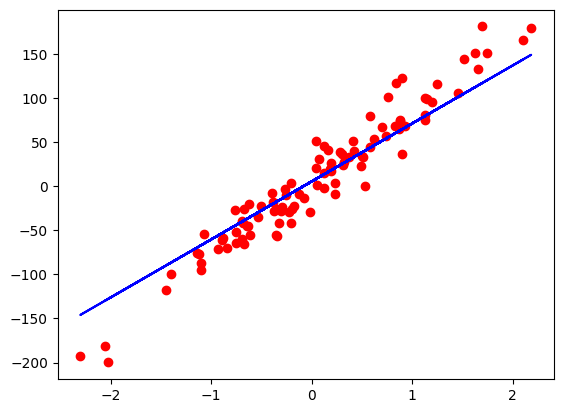

In [22]:
# 1) Design model (input, output size, forward pass)
# 2) Construct loss and optimizer
# 3) Training loop
#  - forward pass: compute prediction and loss
#  - backward pass: gradients
#  - update weights
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# 0) Prepare data
x_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)
x = torch.from_numpy(x_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
# reshape the tensor to a column vector
y = y.view(y.shape[0], 1)

n_samples, n_features = x.shape
# 1) model design 
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

# 2) define loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
# 3) training loop
num_epochs = 100
for epoch in range(num_epochs):
    # forward pass and loss
    y_predicted = model(x)
    loss = criterion(y_predicted, y)
    # backward pass (backpropagation) i.e. calculation of the derivatives
    loss.backward()
    # update the weights
    optimizer.step() # updates the weights. The w is already in the optimizer, so no need to call w.grad to calculate the new weights
    optimizer.zero_grad() # empty out the gradients before the next iterations. Otherwise, the backward function will sum up the gradients into the .grad attribute(.grad is internal to the optimizer in this case)
    if (epoch + 1) % 10 == 0:
        print(f'epoch: {epoch + 1}, loss: {loss.item():.4f}')
        
#plot
predicted = model(x).detach() # the detach disables the tensor from being tracked on the computational graph
plt.plot(x_numpy, y_numpy, 'ro')
plt.plot(x_numpy, predicted, 'b')
plt.show()

LOGISTIC REGRESSION 

In [25]:
# 1) Design model (input, output size, forward pass)
# 2) Construct loss and optimizer
# 3) Training loop
#  - forward pass: compute prediction and loss
#  - backward pass: gradients
#  - update weights
import torch 
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 0) prepare data
bc = datasets.load_breast_cancer()
x, y = bc.data, bc.target

n_samples, n_features = x.shape
print(n_samples, n_features)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1234)
# scale the features
sc = StandardScaler() #when dealing with logistic, we want to scale our data to have zero mean and uniform variance 
X_train = sc.fit_transform(x_train) #what is the difference between fit_transform and just transform?
X_test = sc.transform(x_test)

X_train = torch.from_numpy(X_train.astype(np.float32)) # make sure to cast as np.float32 because the original data is of type Double and will cause problems down the road
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0], 1) # what is this shape change?
y_test = y_test.view(y_test.shape[0], 1)

# 1) setup the model 
# f = wx + b, sigmoid function at the end 
class LogisticRegression(nn.Module):
    def __init__(self, n_input_features):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)
    
    def forward(self, x):
        y_predicted = torch.sigmoid(self.linear(x))
        return y_predicted
    
model = LogisticRegression(n_features)

# 2) setup the loss and optimizer
learning_rate = 0.01
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3) training loop
num_epochs = 100
for epoch in range(num_epochs):
    #forward pass and loss calculation
    y_predicted = model(X_train)
    loss = criterion(y_predicted, y_train)
    #backward pass
    loss.backward()
    #updates weights
    optimizer.step()
    #zero gradients
    optimizer.zero_grad()
    
    if (epoch + 1) % 10 == 0:
        print(f'epoch: {epoch + 1}, loss: {loss.item():.4f}')
        
with torch.no_grad(): # for evaluation, we don't want the gradient calculations to be tracked in the computational graph for (model), so we must use torch.no_grad()
    y_predicted = model(X_test)
    y_predicted_cls = y_predicted.round()
    acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
    print(f'Accuracy: {acc:.4f}')

569 30
epoch: 10, loss: 0.4224
epoch: 20, loss: 0.3759
epoch: 30, loss: 0.3416
epoch: 40, loss: 0.3151
epoch: 50, loss: 0.2938
epoch: 60, loss: 0.2764
epoch: 70, loss: 0.2617
epoch: 80, loss: 0.2491
epoch: 90, loss: 0.2383
epoch: 100, loss: 0.2287
Accuracy: 0.8947


DATASET AND DATALOADER  

In [50]:
'''
epoch = 1 forward and backward pass of ALL training samples
batch_size = number of training samples in one forward & backward pass
number of iterations = number of passes, each pass using [batch_size] number of samples
e.g. 100 samples, batch_size=20 --> 100/20 = 5 iterations for 1 epoch
'''
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math

class WineDataset(Dataset):
    def __init__(self):
        # data loading
        xy = np.loadtxt('./wine.csv', delimiter=',', dtype=np.float32, skiprows=1)
        self.x = torch.from_numpy(xy[:, 1:])
        self.y = torch.from_numpy(xy[:, [0]]) # n_samples, 1
        self.n_samples = xy.shape[0]

    def __getitem__(self, item):
        # dataset[0] helps for indexing
        return self.x[item], self.y[item]
    def __len__(self):
        # len(dataset)
        return self.n_samples
    
dataset = WineDataset()
# data iteration without dataloader
# first_data = dataset[0]
# features, labels = first_data
# print(features, labels)

# data iteration with dataloader
dataloader = DataLoader(dataset=dataset, batch_size=4, shuffle=True)
# dataiter = iter(dataloader)
# data = next(dataiter)
# features, labels = data
# print(features, labels)

#training loop
num_epochs = 2
batch_size = 4
total_samples = len(dataset)
n_iterations = math.ceil(total_samples/batch_size)
print(total_samples, n_iterations)

for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(dataloader):
        # forward and backward pass, update the weights
        if (i+5) % 5 ==0:
            print(f'epoch: {epoch + 1}/{num_epochs}, step {i+1}/{n_iterations}, inputs {inputs.shape}')


178 45
epoch: 1/2, step 1/45, inputs torch.Size([4, 13])
epoch: 1/2, step 6/45, inputs torch.Size([4, 13])
epoch: 1/2, step 11/45, inputs torch.Size([4, 13])
epoch: 1/2, step 16/45, inputs torch.Size([4, 13])
epoch: 1/2, step 21/45, inputs torch.Size([4, 13])
epoch: 1/2, step 26/45, inputs torch.Size([4, 13])
epoch: 1/2, step 31/45, inputs torch.Size([4, 13])
epoch: 1/2, step 36/45, inputs torch.Size([4, 13])
epoch: 1/2, step 41/45, inputs torch.Size([4, 13])
epoch: 2/2, step 1/45, inputs torch.Size([4, 13])
epoch: 2/2, step 6/45, inputs torch.Size([4, 13])
epoch: 2/2, step 11/45, inputs torch.Size([4, 13])
epoch: 2/2, step 16/45, inputs torch.Size([4, 13])
epoch: 2/2, step 21/45, inputs torch.Size([4, 13])
epoch: 2/2, step 26/45, inputs torch.Size([4, 13])
epoch: 2/2, step 31/45, inputs torch.Size([4, 13])
epoch: 2/2, step 36/45, inputs torch.Size([4, 13])
epoch: 2/2, step 41/45, inputs torch.Size([4, 13])


DATASET TRANSFORM

In [53]:
'''
Transforms can be applied to PIL images, tensors, ndarrays, or custom data during creation of the DataSet

complete list of built-in transforms:
https://pytorch.org/docs/stable/transforms.html

On Images
----------
CenterCrop, Grayscale, Pad, RandomAffine
RandomCrop, RandomHorizontalFlip, RandomVerticalFlip, 
RandomRotation, Resize, Scale

On Tensors
-----------
LinearTransformation, Normalize, RandomErasing

Conversion
-----------
ToPilImage: from tensor or ndarray
ToTensor: from numpy.ndarray or PILImage

Generic
-----------
Use Lambda

Custom
-----------
Write own class

Compose Multiple Transforms
-----------------------------
composed = transforms.Compose([Rescale(256),
                                RandomCrop(224),])
torchvision.transforms.ReScale(256)
torchvision.transforms.ToTensor()

dataset = torchvision.datasets.MNIST( root="./", transform=torchvision.transforms.ToTensor())

'''
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math

class WineDataset(Dataset):
    def __init__(self, transform=None): # the = on the parameter indicates default value, which in this case would be None
        # data loading
        xy = np.loadtxt('./wine.csv', delimiter=',', dtype=np.float32, skiprows=1)
        self.n_samples = xy.shape[0]
        
        #note that we do not convert to tensor here
        self.x = xy[:, 1:]
        self.y = xy[:, [0]]
        self.transform = transform

    def __getitem__(self, item):
        # dataset[0] helps for indexing
        sample =  self.x[item], self.y[item]
        # if there is a transform
        if self.transform:
            sample = self.transform(sample) # applies the custom transform class. 
            
        return sample  # return the sample, with a transform if one was specified
            
    def __len__(self):
        # len(dataset)
        return self.n_samples

# custom transform class
class ToTensor:
    def __call__(self, sample): # the call function gets called automatically when we pass a sample into the ToTensor class as a function
        inputs, targets = sample
        return torch.from_numpy(inputs), torch.from_numpy(targets)
    
# a multiplication transform class
class MulTransform:
    def __init__(self, factor):
        self.factor = factor
    def __call__(self, sample):
        inputs, targets = sample
        inputs *= self.factor
        return inputs, targets
    
dataset = WineDataset(transform=ToTensor()) 
first_data = dataset[0]
features, labels = first_data
print(features)
print(type(features), type(labels)) # should be a torch.Tensor class

composed = torchvision.transforms.Compose([ToTensor(), MulTransform(4)])
dataset = WineDataset(transform=composed)
first_data = dataset[0]
features, labels = first_data
print(features)
print(type(features), type(labels)) # should be a torch.Tensor class






tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03])
<class 'torch.Tensor'> <class 'torch.Tensor'>
tensor([5.6920e+01, 6.8400e+00, 9.7200e+00, 6.2400e+01, 5.0800e+02, 1.1200e+01,
        1.2240e+01, 1.1200e+00, 9.1600e+00, 2.2560e+01, 4.1600e+00, 1.5680e+01,
        4.2600e+03])
<class 'torch.Tensor'> <class 'torch.Tensor'>


SOFTMAX AND CROSS-ENTROPY FUNCTIONS   

In [56]:
'''
The Softmax function squashes the raw outputs into probabilities i.e.[0 - 1]. It does this by applying the exponential function to each input
and normalizing it by the sum of all inputs
'''
import torch
import torch.nn as nn
import numpy as np

def softmax(x):
    return np.exp(x)/np.sum(np.exp(x), axis=0) # axis of x sums up the inputs across the columns, and y sums up the inputs across the rows.

x = np.array([2.0,1.0, 0.1])
outputs = softmax(x)
print('softmax numpy:', outputs)

# torch version of softmax
x = torch.tensor([2.0, 1.0, 0.1])
outputs = torch.softmax(x, dim=0) # dim is the same as axis for numpy
print('softmax torch:', outputs)



softmax numpy: [0.65900114 0.24243297 0.09856589]
softmax torch: tensor([0.6590, 0.2424, 0.0986])
Loss1 numpy: 0.3567
Loss2 numpy: 2.3026


In [ ]:
'''
A lot times the softmax is combined with the cross-entropy loss function. This measures the performance of our classification model, whose output is a probability between 
0 and 1. It can be used in multi class problems. The loss increases as the predictor probability diverges from the actual label. So the better the prediction, the lower the loss. 
Note: in the case for probability label prediction, our label (Y), needs to be one-hot encoded i.e. Y = [1,0,0]. 

Y = [1, 0, 0] (Actual class label)
(predicted class label from softmax)
Y_hat = [0.7, 0.2, 0.1]  
Cross_entropy = D(Y, Y_hat) = 0.35 (GOOD PREDICTION)

Y = [1, 0, 0] (Actual class label)
(predicted class label from softmax)
Y_hat = [0.1, 0.3, 0.6]  
Cross_entropy = D(Y, Y_hat) = 2.30 (GOOD PREDICTION)
'''

# Cross-Entropy code numpy
import torch 
import torch.nn as nn
import numpy as np

def cross_entropy(actual, predicted):
    loss = -np.sum(actual * np.log(predicted))
    return loss # / float(predicted.shape[0]) The cross-entropy eqn dictates we normalize the output 

# y must be one hot encoded 
# if class 0: [1 0 0]
# if class 1: [0 1 0]
# if class 2: [0 0 1]
Y = np.array([1, 0, 0])

# y_pred has probabilities
Y_pred_good = np.array([0.7,0.2,0.1])
Y_pred_bad = np.array([0.1, 0.3, 0.6])
l1 = cross_entropy(Y, Y_pred_good)
l2 = cross_entropy(Y, Y_pred_bad)
print(f'Loss1 numpy: {l1:.4f}')
print(f'Loss2 numpy: {l2:.4f}')

In [61]:
import torch 
import torch.nn as nn
import numpy as np
'''
Careful! 
nn.CrossEntropyLoss() applies:
nn.LogSoftmax() + nn.NLLLoss() (negative log likelihood loss)

--> No Softmax in last layer! i.e. we should not implement the softmax ourselves, since it is already applied

Y has clas labels, NOT ONE-HOT!
Y_pred has raw scores(logits), NO SOFTMAX!
'''
loss = nn.CrossEntropyLoss()

Y = torch.tensor([0]) # remember it is not one hot encoded, but rather class label
# n_samples * n_classes = 1x3
Y_pred_good = torch.tensor([[2.0, 1.0, 0.1]]) # the class prediction has the raw values, no softmax i.e. normalization
Y_pred_bad = torch.tensor([[0.5, 2.0, 0.3]])

l1 = loss(Y_pred_good, Y) # here order matters, loss(prediction, actual)
l2 = loss(Y_pred_bad, Y)

print(f'L1 loss tensor {l1.item()}')
print(f'L2 loss tensor {l2.item()}')

# actual predictions
_, predictions1 = torch.max(Y_pred_good, dim=1)
_, predictions2 = torch.max(Y_pred_bad, dim=1)
print(predictions1)
print(predictions2)

# loss function with multiple samples
# 3 samples
Y = torch.tensor([2, 0, 1])
# n_samples * n_classes = 3x3
Y_pred_good = torch.tensor([[0.1, 1.0, 2.1], [2.0, 1.0, 0.1], [0.1, 3.0, 0.1]]) # the class prediction has the raw values, no softmax i.e. normalization
Y_pred_bad = torch.tensor([[2.1, 1.0, 0.1], [0.1, 1.0, 2.1], [0.1, 3.0, 0.1]])

l1 = loss(Y_pred_good, Y) # here order matters, loss(prediction, actual)
l2 = loss(Y_pred_bad, Y)

print(f'L1 loss tensor 3 samples: {l1.item()}')
print(f'L2 loss tensor 3 samples: {l2.item()}')

# actual predictions
_, predictions1 = torch.max(Y_pred_good, dim=1)
_, predictions2 = torch.max(Y_pred_bad, dim=1)
print(predictions1)
print(predictions2)


L1 loss tensor 0.4170299470424652
L2 loss tensor 1.840616226196289
tensor([0])
tensor([1])
L1 loss tensor 3 samples: 0.3018244206905365
L2 loss tensor 3 samples: 1.6241613626480103
tensor([2, 0, 1])
tensor([0, 2, 1])


In [64]:
'''
Multiclass cross entropy using a NN and torch.CrossEntropyLoss function
'''
import torch 
import torch.nn as nn
# Multiclass problem
class NeuralNet2(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet2, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, num_classes)
    def forward(self, x):
        out = self.linear1(x) # input layer
        out = self.relu(out) # activation function 
        out = self.linear2(out) # last layer
        # no softmax at the end
        return out

model = NeuralNet2(input_size=28*28, hidden_size=5, num_classes=3)
criterion = nn.CrossEntropyLoss() # applies softmax
# missing parts: data, run the forward and then calculate the loss. 
# TODO: implement this shit 


In [ ]:
'''
Binary class Neural Network with cross entropy. We ask: is this a dog?
For this example, we only have one output on our last layer and then apply the sigmoid(which will return a probability between 0-1 with <0.5=false, >0.5=true)
In PyTorch: Use nn.BCELoss()
Sigmoid at the end!
'''
import torch
import torch.nn as nn

# Binary classification
class NeuralNet1(nn.Module):
    def __init__(self, input_size, hidden_size): # no need for num_classes since we only have one class
        super(NeuralNet1, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, 1) # only one output 
    
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        #sigmoid at the end
        y_pred = torch.sigmoid(out)
        return y_pred
    
model = NeuralNet1(input_size=28*28, hidden_size=5)
criterion = nn.BCELoss()
# TODO: implement this shit 

ACTIVATION FUNCTIONS    

In [ ]:
''''
Activation Functions:
Activation functions apply a non-linear transformation and decide whether a neuron should be activated or not
WHY?
Without activation functions our network is basically just a stacked linear regression model. We use non-linear activation functions
so that our model can learn more complex behaviors and perform better.
--> With non-linear transformations our network can learn better and perform more complex tasks!
--> After each layer we typically use an activation function!

Most popular activation functions:
1.- Step function: output 1 if outputs is greater than a threshold(theta) and 0 otherwise. Not use in practice
2.- Sigmoid Function: Output a probability between 0 and 1. It is typically used in the last layer of a binary classification problem
3.- TanH Function(Hyperbolic tan function): It is a scaled sigmoid function with some shift. It will output a value between -1 and +1. 
It is a good option for hidden layers
4.- ReLU Function: Most popular activation function. The function will output a 0 for negative values and output a linear function for values greater than 0. It is actually non-linear (f(x) = max(0,x))
Rule of thumb: If you don't know what to use, just use a ReLU for hidden layers
5.- Leaky ReLU Function: For negative numbers, it will output the value times a small value "a", and the regular ReLU otherwise
--> Improved version of ReLU. Tries to solve the vanishing gradient problem. With a normal ReLU, our values for negative inputs are 0 and this means that the gradient is also 0 during our backpropagation. When the gradient is 0, the weights will never be updated, so the neurons won't learn anything because they are dead. 
6.- SoftMax: Squashing function that forces the outputs to be probabilities between 0 and 1.  
--> Good in last layer in multi class classification problems 
'''
import torch 
import torch.nn as nn
import torch.nn.functional as F
 
''''
Activation functions in nn:
- nn.Sigmoid
- nn.TanH
- nn.LeakyReLU
- nn.Softmax

Activation functions in torch:
- torch.relu
- torch.sigmoid
- torch.softmax
- torch.tanh

Some activation functions are not available in the torch api directly, but they are available in the torch.nn.functional:
- F.relu
- F.leaky_relu
'''
# option 1 (create nn modules)
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, 1)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        out = self.sigmoid(out)
        return out
    
# option 2 (use activation functions directly in forward pass)
class NeuralNet2(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet2, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.linear2 = nn.Linear(hidden_size, 1)
    
    def forward(self, x):
        out = torch.relu(self.linear1(x))
        out = torch.sigmoid(self.linear2(out))
        return out


FEED-FORWARD NEURAL NETWORK 

torch.Size([100, 1, 28, 28]) torch.Size([100])
epoch 1 / 2, step 100/600, loss 0.4584
epoch 1 / 2, step 200/600, loss 0.3991
epoch 1 / 2, step 300/600, loss 0.2317
epoch 1 / 2, step 400/600, loss 0.3321
epoch 1 / 2, step 500/600, loss 0.3246
epoch 1 / 2, step 600/600, loss 0.3441
epoch 2 / 2, step 100/600, loss 0.2700
epoch 2 / 2, step 200/600, loss 0.3201
epoch 2 / 2, step 300/600, loss 0.2097
epoch 2 / 2, step 400/600, loss 0.2031
epoch 2 / 2, step 500/600, loss 0.2140
epoch 2 / 2, step 600/600, loss 0.1645
accuracy = 95.39


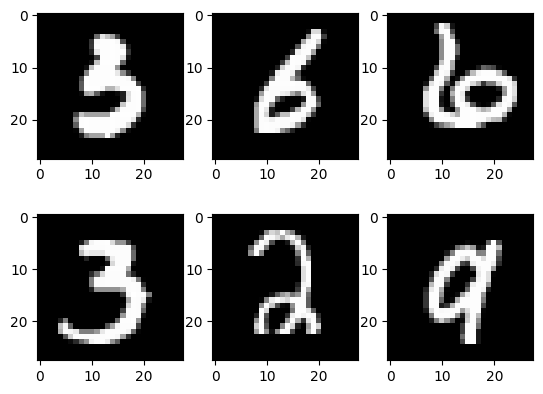

In [71]:
'''
Things included in this section:
MNIST
DataLoader, Transformation 
Multilayer Neural Net, activation function
Loss and Optimizer
Training Loop (batch training)
Model Evaluation
GPU support
'''
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

#device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#hyper parameters
input_size = 784 #28x28 images
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

# MNIST
# parameters breakdown: root is the location to retrieve the dataset or save it into, train is to specify if this is the training data, transform is the transformations to be applied to the data
# download is download if the dataset is not present on the root folder i.e. not already downloaded
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)

test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())
# the shuffle true, just shuffles the train dataset for better randomness i guess
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

examples = iter(train_loader)
samples, labels = next(examples)
print(samples.shape, labels.shape)
# torch.Size([100, 1, 28, 28]) torch.Size([100])
# 100 samples in our batch, 1 channel i.e. no color channels, 28x28 is the image size. The labels are 100
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(samples[i][0], cmap='gray') #cmap is color map
#plt.show()

# fully connected Neural Network with one hidden layer 
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, num_classes)
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out) #we don't apply softmax after this layer because we will use the cross-entropy function which already does this for us
        return out
    
model = NeuralNet(input_size, hidden_size, num_classes).to(device) #don't forget to send the model into the cuda device, as well as all the tensors that we will be using (images, labels)

#loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

#training loop 
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # 100, 1, 28, 28
        # input_size = 784 so we need to resize our images
        images = images.reshape(-1, 28*28).to(device) #pushing it to the gpu if one is available
        labels = labels.to(device)
        
        #forward
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        #backward 
        optimizer.zero_grad() #empty the values in the gradient
        loss.backward() #calculate the gradients
        optimizer.step() #update the weights
        
        if (i+1) % 100 == 0:
            print(f'epoch {epoch + 1} / {num_epochs}, step {i+1}/{n_total_steps}, loss {loss.item():.4f}')

# testing and evaluation
with torch.no_grad(): # we don't want to calculate the gradients for the testing so we wrap it with torch.no_grad()
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        
        # the max function will return the value and the index (value, index)
        _, predictions = torch.max(outputs, 1)
        n_samples += labels.shape[0] #should be 100
        n_correct += (predictions == labels).sum().item() #for each correct prediction, we will add +1
        
    acc = 100.0 * n_correct / n_samples
    print(f"accuracy = {acc:.2f}")

Convolutional Neural Network    

In [74]:
# we will be using the CIFAR-10 dataset available in pytorch to classify the images(which have 10 classes)
'''
Convolutional neural networks are mostly used for image classification. The typical architecture fo a CNN involves convolutions, activation functions and pooling
The convolutional filters they work by applying a filter kernel in our image. The calculation is the multiplication of the original image region, with the filter and adding the result to be outputted to the resulting image(or output). With the transform, the resulting image output will be smaller, unless we use padding, or adjust the stride
After conv filter application, we use the max pooling. In a 2x2 max pooling, we have a 2x2 region. We take the max value from output image, with respect to their pooling region and output that to 
the pooling output. This is done to reduce the computational cost by reducing the size of the image. It reduces the number of parameters our algorithm needs to learn. It also helps to avoid overfitting by providing an abstracted version of the image. 
'''
import torch 
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# hyper-parameters
num_epochs = 4
batch_size = 4
learning_rate = 0.001

# dataset has PILImage(pillow images) of range[0, 1]
# we transform them to tensors of normalized range [-1, 1]
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, transform=transform)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__() # don't forget to call the super
        self.conv1 = nn.Conv2d(3, 6, 5) #inputsize, outputsize, kernel size i.e. we have 3 color channels, 6 as our output and kernel size of 5
        self.pool = nn.MaxPool2d(2, 2) # kernel size, stride size i.e. we want our downsized pooling section to be of a 2x2 region
        self.conv2 = nn.Conv2d(6, 16, 5) # the output of the first conv must match the input of this conv layer
        self.fc1 = nn.Linear(16 * 5 * 5, 120) # 
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10) # our output size is 10 because we have 10 classes
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x))) # we apply the first conv layer, then the activation function(ReLu) and then we pool 
        x = self.pool(F.relu(self.conv2(x))) # same here
        x = x.view(-1, 16 * 5 * 5) #We flatten our tensor. We put the -1 in so that pytorch can determine the proper size that should go there. In this case is the batch size. The second parameter is the combination of our last conv layer's output size times the kernel size of both layers i.e. 16*5*5
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x) # no activation function at the end and no soft max since the cross entropy loss already calculates the soft max
        return x
        
    
model = ConvNet().to(device)

criterion = nn.CrossEntropyLoss()  # this is the loss, and remember that the softmax is applied here so no need to implement one ourselves
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # origin shape: [4, 3, 32, 32] = 4, 3, 1024 
        # input_layer: 3 input channels, 6 output channels, 5 kernel size
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad() # zero out the gradients so that they don't get added to each other
        loss.backward() # actual propagation i.e. gradient calculation
        optimizer.step() # update the weights
        
        if (i+1) % 2000 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')
            
print('Finished Training')

# testing and validation
with torch.no_grad(): # we surround the testing with torch.no_grad() because we don't need the gradient calculations 
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value, index)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
        
        for i in range(batch_size):
            label = labels[i]
            pred = predicted[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1
    acc = 100.0 * n_correct / n_samples
    print(f"Accuracy of the network = {acc:.2f}%")
    
    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc:.2f}%')

Files already downloaded and verified
Epoch [1/4], Step [2000/12500], Loss: 2.2984
Epoch [1/4], Step [4000/12500], Loss: 2.2875
Epoch [1/4], Step [6000/12500], Loss: 2.3185
Epoch [1/4], Step [8000/12500], Loss: 2.3205
Epoch [1/4], Step [10000/12500], Loss: 2.2787
Epoch [1/4], Step [12000/12500], Loss: 2.1251
Epoch [2/4], Step [2000/12500], Loss: 2.0235
Epoch [2/4], Step [4000/12500], Loss: 1.7481
Epoch [2/4], Step [6000/12500], Loss: 2.1244
Epoch [2/4], Step [8000/12500], Loss: 1.7504
Epoch [2/4], Step [10000/12500], Loss: 1.2457
Epoch [2/4], Step [12000/12500], Loss: 1.5893
Epoch [3/4], Step [2000/12500], Loss: 2.3549
Epoch [3/4], Step [4000/12500], Loss: 2.3066
Epoch [3/4], Step [6000/12500], Loss: 1.6546
Epoch [3/4], Step [8000/12500], Loss: 1.2742
Epoch [3/4], Step [10000/12500], Loss: 1.2340
Epoch [3/4], Step [12000/12500], Loss: 1.8568
Epoch [4/4], Step [2000/12500], Loss: 1.6001
Epoch [4/4], Step [4000/12500], Loss: 1.4192
Epoch [4/4], Step [6000/12500], Loss: 1.2820
Epoch [4/4]

100%|██████████| 170M/170M [00:04<00:00, 35.7MB/s] 


Extracting ./data\cifar-10-python.tar.gz to ./data


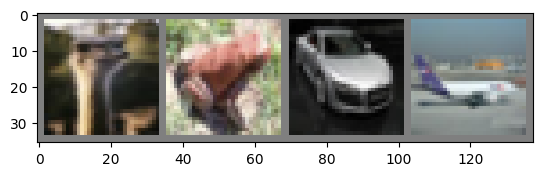

torch.Size([4, 3, 32, 32])
torch.Size([4, 6, 28, 28])
torch.Size([4, 6, 14, 14])
torch.Size([4, 16, 10, 10])
torch.Size([4, 16, 5, 5])


In [72]:
#cnn test, this part showcases why the dimensions are what they are above
import torch 
import torch.nn as nn
import torch.nn.functional as F
import torchvision 
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Device configuration 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Hyper parameters
num_epochs = 0
batch_size = 4
learning_rate = 0.001

#dataset has PILImages of range [0, 1]
# We transform them to Tensors of normalized range [-1, 1]
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, transform=transform)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    
# get some random trining images
dataiter = iter(train_loader)
images, labels = next(dataiter)

#show images
imshow(torchvision.utils.make_grid(images))

conv1 = nn.Conv2d(3, 6, 5)
pool = nn.MaxPool2d(2, 2)
conv2 = nn.Conv2d(6, 16, 5)
print(images.shape)
x = conv1(images)
print(x.shape)
x = pool(x)
print(x.shape)
x = conv2(x)
print(x.shape)
x = pool(x)
print(x.shape)

TRANSFER LEARNING   

In [77]:
'''
Transfer learning is a machine learning method in which a model developed for a first task is then reused as the starting point for a model on a second task. 
For example, we can use a model that was trained to classify birds and cars and modify it a little bit in the last layer and then use it to classify bees and dogs. 
It allows rapid generation of new models(pre-trained) and it is super important, because training of a new model can be super time consuming. Training a model from scratch can take multiple days or even weeks. Transfer learning can achieve pretty good results, hence why it is so popular nowadays 
'''
# we will use the resnet_18 CNN as our base model. This is a model that has been trained with more than 1 million images from the resnet image database. 18 layers deep, and can classify 
# objects into 1000 object categories. For our example, we only have 2 categories: bees and ants
#ImageFolder, folder where the images from the dataset go
#Scheduler, schedule the change of the learning rate
#Transfer Learning
import torch 
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time 
import os 
import copy

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])

data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean=mean, std=std)
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=mean, std=std)
    ])
}

#import data
data_dir = './data/hymenoptera_data'
sets = ['train','val']
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ['train','val']}

dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4, shuffle=True, num_workers=0) for x in ['train','val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train','val']}
class_names = image_datasets['train'].classes
print(class_names)

def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()
    
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    
    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs-1}')
        print('-' * 10)
        
        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train() # set model to training mode
            else:
                model.eval() # set model to evaluate mode
            
            running_loss = 0.0
            running_corrects = 0
            
            #Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)
                
                #forward
                #track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)
                    
                    #backward + optimize only if in training phase
                    if phase == 'train':
                        optimizer.zero_grad() # empty the gradients
                        loss.backward() # calculate the gradients aka back propagate
                        optimizer.step() # update weights
                
                #statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            
            if phase == 'train':
                scheduler.step()
                
            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]
            
            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')
            
            #deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
                
        print()
    
    time_elapsed = time.time() - since
    print(f'Training complete in: {time_elapsed//60:.0f}m {time_elapsed%60:.0f}s')
    print(f'Best val Acc: {best_acc*100:.4f}')
    
    #load best model weights
    model.load_state_dict(best_model_wts)
    return model

# finetuning the weights based on the new data
model = models.resnet18(pretrained=True) # download the resnet18 model and pretrained=True, which already has the optimized weights
# we want to exchange the last fully connected layer
num_ftrs = model.fc.in_features # the number of input features for the last layer on the resnet model

# create a new layer and assign it to the last layer 
model.fc = nn.Linear(num_ftrs, 2) # the outputs will be 2 because we only have two classes that we want to classify: bees and ants
model.to(device) # move the model to the GPU, if one is available

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001) # we don't have to specify the momentum, its optional i.e. default value will be set

# scheduler will update the learning rate
step_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1) # we have to give it the optimizer, step size and gamma. This means that every 7 epochs, our learning rate is multiplied by the gamma

# # loop over the epochs
# for epoch in range(100):
#     train() #optimizer.step()
#     evaluate()
#     scheduler.step()

#call the training function
model = train_model(model, criterion, optimizer, step_lr_scheduler, num_epochs=20)

#######################
# Second option: freeze all the layers in the beginning and only train the very last layer. This is a faster option since the layers are frozen
#######################
model = models.resnet18(pretrained=True) # download the resnet18 model and pretrained=True, which already has the optimized weights
for param in model.parameters():
    param.requires_grad = False # freezes the beginning layers

# we want to exchange the last fully connected layer and by default the requires_grad = True
num_ftrs = model.fc.in_features # the number of input features for the last layer on the resnet model

# create a new layer and assign it to the last layer 
model.fc = nn.Linear(num_ftrs, 2) # the outputs will be 2 because we only have two classes that we want to classify: bees and ants
model.to(device) # move the model to the GPU, if one is available

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001) # we don't have to specify the momentum, its optional i.e. default value will be set

# scheduler will update the learning rate
step_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1) # we have to give it the optimizer, step size and gamma. This means that every 7 epochs, our learning rate is multiplied by the gamma

#call the training function
model = train_model(model, criterion, optimizer, step_lr_scheduler, num_epochs=20)

['ants', 'bees']
Epoch 0/19
----------
train Loss: 0.6167 Acc: 0.6680
val Loss: 0.5057 Acc: 0.7582

Epoch 1/19
----------
train Loss: 0.5130 Acc: 0.7664
val Loss: 0.3561 Acc: 0.8824

Epoch 2/19
----------
train Loss: 0.4581 Acc: 0.7869
val Loss: 0.2803 Acc: 0.9020

Epoch 3/19
----------
train Loss: 0.4617 Acc: 0.7828
val Loss: 0.2537 Acc: 0.9281

Epoch 4/19
----------
train Loss: 0.3598 Acc: 0.8730
val Loss: 0.2221 Acc: 0.9346

Epoch 5/19
----------
train Loss: 0.3693 Acc: 0.8320
val Loss: 0.2238 Acc: 0.9020

Epoch 6/19
----------
train Loss: 0.3931 Acc: 0.8156
val Loss: 0.2040 Acc: 0.9281

Epoch 7/19
----------
train Loss: 0.3898 Acc: 0.8361
val Loss: 0.1959 Acc: 0.9281

Epoch 8/19
----------
train Loss: 0.3442 Acc: 0.8648
val Loss: 0.1951 Acc: 0.9281

Epoch 9/19
----------
train Loss: 0.3524 Acc: 0.8402
val Loss: 0.2145 Acc: 0.9281

Epoch 10/19
----------
train Loss: 0.3641 Acc: 0.8566
val Loss: 0.1848 Acc: 0.9412

Epoch 11/19
----------
train Loss: 0.3984 Acc: 0.8402
val Loss: 0.197

TENSORBOARD

torch.Size([100, 1, 28, 28]) torch.Size([100])
epoch 1 / 2, step 100/600, loss 0.5192
epoch 1 / 2, step 200/600, loss 0.2581
epoch 1 / 2, step 300/600, loss 0.4149
epoch 1 / 2, step 400/600, loss 0.2148
epoch 1 / 2, step 500/600, loss 0.1618
epoch 1 / 2, step 600/600, loss 0.1990
epoch 2 / 2, step 100/600, loss 0.2731
epoch 2 / 2, step 200/600, loss 0.1657
epoch 2 / 2, step 300/600, loss 0.1116
epoch 2 / 2, step 400/600, loss 0.1808
epoch 2 / 2, step 500/600, loss 0.1517
epoch 2 / 2, step 600/600, loss 0.2239
accuracy = 95.16


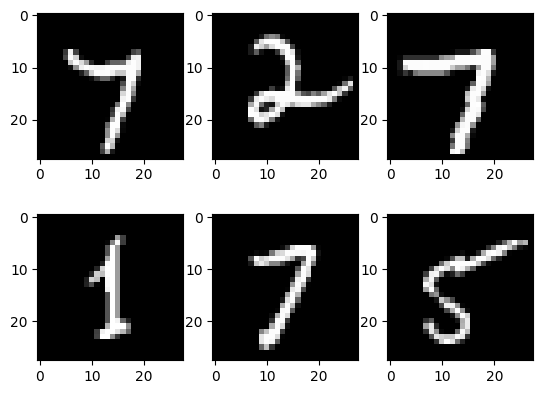

In [88]:
'''
Tensorboard is a visualization toolkit used to visualize and analyze our model and training pipeline. https://tensorflow.org/tensorboard
- Tracking and visualizing metrics such as loss and accuracy
- Visualizing the model graph (ops and layers)
- Viewing histograms of weights, biases, or other tensors as they change over time
- Projecting embeddings to a lower dimensional space
- Displaying images, text and audio data
- Profiling TensorFlow programs
- And much more 
NOTE: For the pycharm jupyter notebook extension, make sure to run the tensorboard on the integrated terminal, not the anaconda environment terminal
run: tensorboard --logdir=runs, which will open the tensorboard on http://localhost:6006

WHAT IS A PRECISION/RECALL CURVE?
Let's you understand your model performance and the different threshold settings. Also called, ROC curve
'''
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn.functional as F
import sys
# setup the tensorboard writer
from torch.utils.tensorboard import SummaryWriter # import the summary writer
writer = SummaryWriter('runs')

#device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#hyper parameters
input_size = 784 #28x28 images
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

# MNIST
# parameters breakdown: root is the location to retrieve the dataset or save it into, train is to specify if this is the training data, transform is the transformations to be applied to the data
# download is download if the dataset is not present on the root folder i.e. not already downloaded
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)

test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())
# the shuffle true, just shuffles the train dataset for better randomness i guess
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

examples = iter(train_loader)
samples, labels = next(examples)
print(samples.shape, labels.shape)
# torch.Size([100, 1, 28, 28]) torch.Size([100])
# 100 samples in our batch, 1 channel i.e. no color channels, 28x28 is the image size. The labels are 100
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(samples[i][0], cmap='gray') #cmap is color map
#plt.show()
# plot to the tensorboard 
img_grid = torchvision.utils.make_grid(samples)
writer.add_image("mnist_images", img_grid)
# writer.close() # all the outputs are being flushed
# sys.exit() # exit because we don't want to run the whole training pipeline

# fully connected Neural Network with one hidden layer 
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, num_classes)
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out) #we don't apply softmax after this layer because we will use the cross-entropy function which already does this for us
        return out
    
model = NeuralNet(input_size, hidden_size, num_classes).to(device) #don't forget to send the model into the cuda device, as well as all the tensors that we will be using (images, labels)

#loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

#add model graph to tensorboard
writer.add_graph(model, samples.reshape(-1, 28*28).to(device)) #make sure to send the tensor(samples to the GPU), otherwise the graph won't show up on the tensorboard
writer.close()
# sys.exit()

#training loop 
n_total_steps = len(train_loader)
running_loss = 0.0
running_correct = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # 100, 1, 28, 28
        # input_size = 784 so we need to resize our images
        images = images.reshape(-1, 28*28).to(device) #pushing it to the gpu if one is available
        labels = labels.to(device)
        
        #forward
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        #backward 
        optimizer.zero_grad() #empty the values in the gradient
        loss.backward() #calculate the gradients
        optimizer.step() #update the weights
        
        running_loss += loss.item() # calculate the running loss for the epoch
        
        _, predicted = torch.max(outputs.data, 1) # get the predictions
        running_correct += (predicted == labels).sum().item() # compound the number of correct predictions for the epoch
        
        if (i+1) % 100 == 0:
            print(f'epoch {epoch + 1} / {num_epochs}, step {i+1}/{n_total_steps}, loss {loss.item():.4f}')
            writer.add_scalar('training loss', running_loss / 100, epoch * n_total_steps + i) # add the running training loss for the epoch to the tensorboard with a global step
            writer.add_scalar('Accuracy', running_correct / 100, epoch * n_total_steps + i) # add the running correct predictions for the epoch to the tensorboard with a global step
            running_loss = 0.0 # zero out the running loss for the next epoch iteration
            running_correct = 0 # zero out the running correct predictions for the next epoch

# testing and evaluation
# In test phase, we don't need to compute gradients (For memory efficiency)
####################
#Adding Precision Curves
####################
labels_to_plot = []
preds = []

with torch.no_grad(): # we don't want to calculate the gradients for the testing so we wrap it with torch.no_grad()
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        
        # the max function will return the value and the index (value, index)
        _, predictions = torch.max(outputs, 1)
        n_samples += labels.shape[0] #should be 100
        n_correct += (predictions == labels).sum().item() #for each correct prediction, we will add +1
        
        # for PR curves
        labels_to_plot.append(labels) #we append the labels to be plotted to our tensorboard as our ground truth
           # we need our predictions to be represented as a probability, so we must apply the SoftMax to our outputs(during this evaluation phase)
        class_predictions = [F.softmax(output, dim=0) for output in outputs]
        preds.append(class_predictions)
    
    #still on the tensorboard side
    preds = torch.cat([torch.stack(batch) for batch in preds]) # for our predictions we want to stack the predictions into a 2-dimensional tensor. We do this by concatenating 
    labels_to_plot = torch.cat(labels_to_plot) # converts the labels into a one-dimensional tensor
        
    acc = 100.0 * n_correct / n_samples
    print(f"accuracy = {acc:.2f}")
    
    # tensor board pr curve calculations
    classes = range(10) # since we are doing digits for our classes, a simple range will suffice
    for i in classes:
        labels_i = labels_to_plot == i # we get the labels_i when labels_to_plot is i
        preds_i = preds[:, i] # all the samples, but only for the class i
        writer.add_pr_curve(str(i), labels_i, preds_i, global_step=0)
        writer.close()

SAVING AND LOADING MODULES

In [7]:
'''
Methods that we need to save and load models 
torch.save(arg, PATH): For COMPLETE MODEL
Can use tensors, models or any dictionary as parameter for saving. Saves it as a serialized pkl file, not human readable 

torch.load(PATH):

model.load_state_dict(arg):

OPTION 1: LAZY OPTION Disadvantage: the serialized data is bound to the specific classes and the exact directory structure used when the model is saved
torch.save(model, PATH)  for saving
For Retrieval
model = torch.load(PATH)
model.eval() this puts the model on the eval mode

OPTION 2: THE RECOMMENDED WAY. If we just want to save our trained model and use it later for inference, then we only need to save the parameters
### STATE DICT #####
torch.save(model.state_dict(), PATH)  this saves the parameters when called on the model.state_dict()

# for retrieval, model must be created again with parameters
model = Model(*args, **kwargs)  this implies recreating the model, but do we need to recreate the structure as well? like n-hidden layers with the correct number of nodes on each layer? FOOD FOR THOUGHT
model.load_state_dict(torch.load(PATH))  # we need to pass the PATH onto the torch.load() to properly load the dictionary 
model.eval()    sets the model to eval mode
'''
import torch 
import torch.nn as nn

class Model(nn.Module):
    def __init__(self, n_input_features):
        super(Model, self).__init__()
        self.linear1 = nn.Linear(n_input_features, 1) # this is a dummy model, with only one layer and mapped to one output
    
    def forward(self, x):
        y_pred = torch.sigmoid(self.linear1(x))
        return y_pred
    
model = Model(n_input_features=6) # comment this out when loading the model
for param in model.parameters(): # print the parameters of our original model. Since we don't do any training, our model is initialized with some random parameters
    print(param)
# train your model aka the training loop would go here

'''
THE LAZY METHOD OF SAVING THE WHOLE MODEL AND SUBSEQUENTLY LOADING IT
'''
# FILE = "model.pth" # the convention is to name our saved model as model.pth
# # torch.save(model, FILE) # saves the entire model   (comment this out when loading the model)
# #################loading the model##################
# model = torch.load(FILE) # load the complete model (comment out when saving the model)
# model.eval() # put the loaded model on eval mode (comment out when saving the model)
# # we can inspect the parameters of our loaded model
# for param in model.parameters():
#     print(param)

'''
THE PREFERRED METHOD OF SAVING YOUR MODEL AND SUBSEQUENTLY LOADING IT
'''
FILE = "model.pth"
torch.save(model.state_dict(), FILE) # here we are saving the model parameters, not the whole model (comment our when loading your model )
######################LOADING THE MODEL PARAMETERS############################
loaded_model = Model(n_input_features=6) # same structure as the original model(the saved one). We need to reconstruct the structure of the model. (Comment out when saving your model)
loaded_model.load_state_dict(torch.load(FILE))
loaded_model.eval()
for param in loaded_model.parameters():
    print(param)



Parameter containing:
tensor([[ 0.2645, -0.1131,  0.1431, -0.3426,  0.1995, -0.2218]],
       requires_grad=True)
Parameter containing:
tensor([0.1216], requires_grad=True)
Parameter containing:
tensor([[ 0.2645, -0.1131,  0.1431, -0.3426,  0.1995, -0.2218]],
       requires_grad=True)
Parameter containing:
tensor([0.1216], requires_grad=True)


C:\Users\luisp\AppData\Local\Temp\ipykernel_10832\1399985663.py:61: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load(FILE))


In [11]:
'''
How to save model checkpoints during training 
'''
import torch 
import torch.nn as nn

class Model(nn.Module):
    def __init__(self, n_input_features):
        super(Model, self).__init__()
        self.linear1 = nn.Linear(n_input_features, 1) # this is a dummy model, with only one layer and mapped to one output
    
    def forward(self, x):
        y_pred = torch.sigmoid(self.linear1(x))
        return y_pred
    
model = Model(n_input_features=6) # comment this out when loading the model
# train your model....
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
print(model.state_dict()) 
print(optimizer.state_dict()) # the optimizer also has a state dict that contains things like lr, momentum, dampening, weight_decay, etc
# let's say we want to stop training at a certain point and save the checkpoint
# we first need to create a dictionary for our checkpoint
checkpoint = {
    'epoch': 90,
    'model_state': model.state_dict(),
    'optim_state': optimizer.state_dict()
}
# save the checkpoint
# torch.save(checkpoint, "checkpoint.pth") # since torch.save() can save any dictionary, this is a valid way of saving the checkpoint (comment during checkpoint load)
##############LAOD THE CHECKPOINT################
loaded_checkpoint = torch.load("checkpoint.pth")
epoch = loaded_checkpoint['epoch']
# recreate the model
model = Model(n_input_features=6)
optimizer = torch.optim.SGD(model.parameters(), lr=0)
#load the state_dicts
model.load_state_dict(loaded_checkpoint['model_state']) # loads the saved model's parameters
optimizer.load_state_dict(loaded_checkpoint['optim_state']) #laods the saved optimizer's parameters
####NOTE: Since we are intending on continuing training, we don't set the model to the eval mode
print(optimizer.state_dict())

OrderedDict([('linear1.weight', tensor([[ 0.3698, -0.1226, -0.0857,  0.1412, -0.1845, -0.0698]])), ('linear1.bias', tensor([0.1682]))])
{'state': {}, 'param_groups': [{'lr': 0.01, 'momentum': 0, 'dampening': 0, 'weight_decay': 0, 'nesterov': False, 'maximize': False, 'foreach': None, 'differentiable': False, 'fused': None, 'params': [0, 1]}]}
{'state': {}, 'param_groups': [{'lr': 0.01, 'momentum': 0, 'dampening': 0, 'weight_decay': 0, 'nesterov': False, 'maximize': False, 'foreach': None, 'differentiable': False, 'fused': None, 'params': [0, 1]}]}


C:\Users\luisp\AppData\Local\Temp\ipykernel_10832\569386674.py:32: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_checkpoint = torch.load("checkpoint.pth")


In [ ]:
'''
LOADING AND SAVING TO AND FROM THE GPU/CPU
'''
import torch
import torch.nn as nn

PATH = "somepath"

#Save on GPU, Load on CPU
device = torch.device("cuda") #set to use the GPU
model.to(device) # send the model to the GPU
torch.save(model.state_dict(), PATH)

device = torch.device("cpu") # change to use the CPU instead
model = Model(*args, **kwargs)
model.load_state_dict(torch.load(PATH, map_location=device)) #herewe specify that we want to load our model onto our device, which is CPU at the moment


#Save on GPU, Load on GPU
device = torch.device("cuda") # set your device to cuda for GPU
model.to(device) # send the model to the GPU
torch.save(model.state_dict(), PATH)

model = Model(*args, **kwargs)
model.load_state_dict(torch.load(PATH))
model.to(device) # send the loaded model to the GPU 


#Save on CPU, load on GPU
torch.save(model.state_dict(), PATH)

device = torch.device("cuda")
model = Model(*args, **kwargs)
model.load_state_dict(torch.load(PATH, map_location="cuda:0")) # Choose whatever GPU device, if you have more than 1. i.e. the number 0 is the GPU device
model.to(device)
# When you continue training, make sure to send the samples, i.e. data tensors to the same device to which you sent your model to 